# Decision Tree Regressor

In [13]:
#Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor


In [14]:
#Reading in cleaned data
df = pd.read_excel('Car_details_v3_cleaned.xlsx',index_col=0)

In [15]:
#Changing fuel to dummy variable (Petrol=0, Diesel=1)
df['fuel'] = np.where(df['fuel']=='Diesel',1,0)

In [16]:
#Changing transmission to dummy variable (Manual=0, Automatic=1)
df['transmission'] = np.where(df['transmission']=='Automatic',1,0)

In [17]:
#One hot encoding seller_type
seller_type = pd.get_dummies(df['seller_type'])
df_tree = pd.concat([df,seller_type],axis=1)
df_tree.drop(['seller_type','Trustmark Dealer'],axis=1,inplace=True)
print(df_tree)

      year  selling_price  km_driven  fuel  transmission  mileage  engine  \
0     2014         450000     145500     1             0    23.40    1248   
1     2014         370000     120000     1             0    21.14    1498   
2     2006         158000     140000     0             0    17.70    1497   
3     2010         225000     127000     1             0    23.00    1396   
4     2007         130000     120000     0             0    16.10    1298   
...    ...            ...        ...   ...           ...      ...     ...   
8123  2013         320000     110000     0             0    18.50    1197   
8124  2007         135000     119000     1             0    16.80    1493   
8125  2009         382000     120000     1             0    19.30    1248   
8126  2013         290000      25000     1             0    23.57    1396   
8127  2013         290000      25000     1             0    23.57    1396   

      max_power  seats  origin  Dealer  Individual  
0         74.00      5

In [18]:
#One hot encoding origin
origin = pd.get_dummies(df['origin'])
df_tree = pd.concat([df_tree,origin],axis=1)
df_tree.drop(['origin','North America'],axis=1,inplace=True)
print(df_tree)

      year  selling_price  km_driven  fuel  transmission  mileage  engine  \
0     2014         450000     145500     1             0    23.40    1248   
1     2014         370000     120000     1             0    21.14    1498   
2     2006         158000     140000     0             0    17.70    1497   
3     2010         225000     127000     1             0    23.00    1396   
4     2007         130000     120000     0             0    16.10    1298   
...    ...            ...        ...   ...           ...      ...     ...   
8123  2013         320000     110000     0             0    18.50    1197   
8124  2007         135000     119000     1             0    16.80    1493   
8125  2009         382000     120000     1             0    19.30    1248   
8126  2013         290000      25000     1             0    23.57    1396   
8127  2013         290000      25000     1             0    23.57    1396   

      max_power  seats  Dealer  Individual  Asia  Europe  
0         74.00 

In [19]:
#Splitting data into training and test data
X = df_tree.drop('selling_price',axis=1)
y = df_tree['selling_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [20]:
# Decision Tree with default parameters
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [21]:
#Predicting selling_price for train and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [22]:
#Goodness of fit measures (model may be overfitting based on RMSE for test data compared to RMSE for training data)
print('RMSE for training data: {}'.format(sqrt(mean_squared_error(y_train,y_pred_train))))
print('RMSE for test data: {}'.format(sqrt(mean_squared_error(y_test,y_pred_test))))
print('R^2 for train data: {}'.format(r2_score(y_train,y_pred_train)))
print('R^2 for test data: {}'.format(r2_score(y_test,y_pred_test)))

RMSE for training data: 18647.029134630797
RMSE for test data: 177739.45761182357
R^2 for train data: 0.9994904756531583
R^2 for test data: 0.945357570233085


In [23]:
#Cross Validation
dt2 = DecisionTreeRegressor(random_state=0,max_depth=5) #added max_depth parameter to prevent overfitting
scoring = {'r2': 'r2',
           'rmse': 'neg_root_mean_squared_error'}
results = cross_validate(dt2, X, y, scoring=scoring, cv=10, return_train_score=True) #10 fold cross validation

train_r2 = results['train_r2']
test_r2 = results['test_r2']
train_rmse = np.abs(results['train_rmse'])
test_rmse = np.abs(results['test_rmse'])

results_df = pd.DataFrame({'train_r2':train_r2, 'test_r2': test_r2, 'train_rmse': train_rmse, 'test_rmse':test_rmse})
mean_results_df = pd.DataFrame({'Mean': [np.mean(train_r2),np.mean(test_r2),np.mean(train_rmse),np.mean(test_rmse)]})
mean_results_df.index = ['train_r2','test_r2','train_rmse','test_rmse']
print(results_df)
print(mean_results_df)

   train_r2   test_r2     train_rmse      test_rmse
0  0.938455  0.945508  199182.004023  203728.373216
1  0.937002  0.940332  202045.841421  208985.760003
2  0.942035  0.878610  198098.212771  237815.428812
3  0.941845  0.942237  194730.842426  200414.093824
4  0.937452  0.937796  205688.751979  171447.573314
5  0.938118  0.897515  194211.808032  326631.163286
6  0.940063  0.913980  196948.711217  252215.509773
7  0.941292  0.847529  201330.766967  227483.919950
8  0.939133  0.939684  200771.594395  190592.959553
9  0.942266  0.841575  194593.040052  323351.445186
                     Mean
train_r2         0.939766
test_r2          0.908477
train_rmse  198760.157328
test_rmse   234266.622692


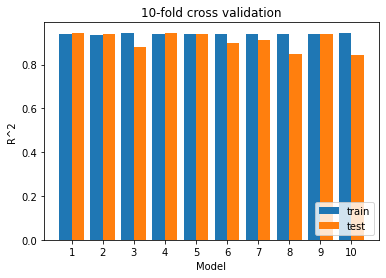

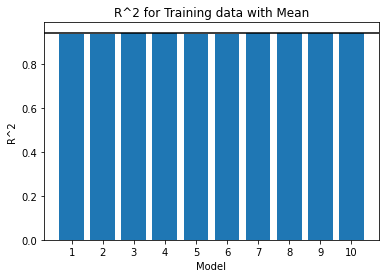

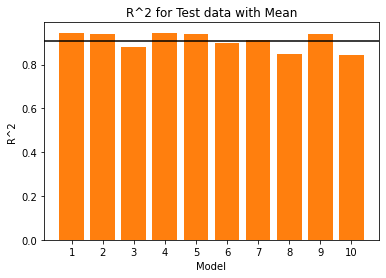

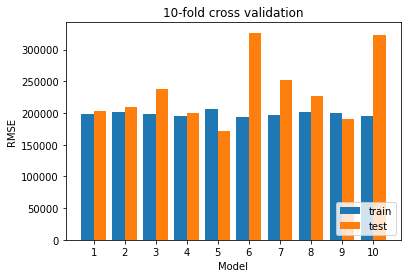

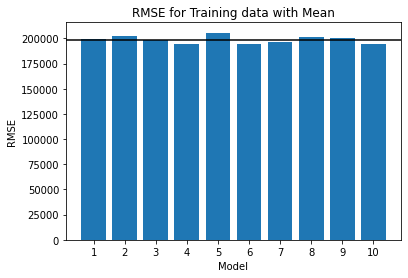

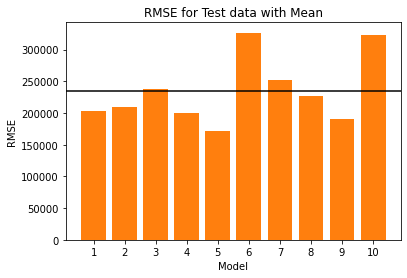

In [24]:
#Bar Charts of results

#R^2 group bar chart
x_label = ['1','2','3','4','5','6','7','8','9','10']
x_axis = np.arange(len(x_label))
plt.figure()
plt.bar(x_axis - 0.2, train_r2, 0.4, label = 'train')
plt.bar(x_axis + 0.2, test_r2, 0.4, label = 'test')
plt.xticks(x_axis, x_label)
plt.xlabel('Model')
plt.ylabel('R^2')
plt.legend(loc = 'lower right')
plt.title('10-fold cross validation')
plt.show()

#Train R^2 bar chart
plt.figure()
plt.bar(x_axis, train_r2)
plt.xticks(x_axis, x_label)
plt.xlabel('Model')
plt.ylabel('R^2')
plt.title('R^2 for Training data with Mean')
plt.axhline(y = np.mean(train_r2), color='black')
plt.show()

#Test R^2 bar chart
plt.figure()
plt.bar(x_axis, test_r2, color='tab:orange')
plt.xticks(x_axis, x_label)
plt.xlabel('Model')
plt.ylabel('R^2')
plt.title('R^2 for Test data with Mean')
plt.axhline(y = np.mean(test_r2), color='black')
plt.show()

#RMSE group bar chart
plt.figure()
plt.bar(x_axis - 0.2, train_rmse, 0.4, label = 'train')
plt.bar(x_axis + 0.2, test_rmse, 0.4, label = 'test')
plt.xticks(x_axis, x_label)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend(loc = 'lower right')
plt.title('10-fold cross validation')
plt.show()

#Train RMSE bar chart
plt.figure()
plt.bar(x_axis, train_rmse)
plt.xticks(x_axis, x_label)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE for Training data with Mean')
plt.axhline(y = np.mean(train_rmse), color='black')
plt.show()

#Test R^2 bar chart
plt.figure()
plt.bar(x_axis, test_rmse, color='tab:orange')
plt.xticks(x_axis, x_label)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE for Test data with Mean')
plt.axhline(y = np.mean(test_rmse), color='black')
plt.show()